# Examen de laboratorio 1(Regesion Multivariable) Grupo 1
 <h3>En este examen de laboratorio se hizo Nro 146 asignado en el excel, se hizo el uso del dataset para hacer predicciones usando la regresion multivariable<h3>
 <HR>
 <h3>
  NOMBRE: POLO ORELLANA BRAYAN SIMON <br>
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  FECHA: 17/04/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Examen%20Laboratorios/Examen%201/Regresion%20Lineal)
  
  * [Enlace al Colab](https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Examen%20Laboratorios/Examen%201/Regresion%20Lineal/Regresion%20lineal.ipynb?hl=es)
  
 <h3>

Para el examen de laboratorio se implemento el dataset [Online News Popularity](https://archive.ics.uci.edu/dataset/332/online+news+popularity).

El conjunto de datos, denominado ``OnlineNewsPopularity.csv``, contiene un conjunto de entrenamiento de conteo de caracteristicas para predecir el numero o cantidad de veces que fue compartida esa pagina. Este conjunto de datos probablemente incluye varias características relevantes para cuantas veces fue compartida la pagina online de noticias.

Primero se importo todas las librerias necesarias:

In [5]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Carga de datos del dataset

cargamos los datos haciendo el uso de la libreria **Pandas** que es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL.

In [6]:
#cargamos el dataset a un dataframe el cual luego mostramos.
df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=',')

#mostramos el dataset en una tabla
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


## Analisis del dataset
Hacemos un analisis del dataset mostrando su informacion usando la funcion de `info()`:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Se puede observar que todos son del mismo tipo de dato, por lo tanto no hay problema para tratar los datos haciendo conversiones o llenando espacios.

In [7]:
#dropeamos las columnas que no necesitamos como el id y la fecha
dataset = df.drop(['url'], axis=1).astype(float)
dataset

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800.0
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100.0


Se puede notar que nuestro dataset cuenta con 21 columnas, donde nuestra colummna `price` sera nuestra Y_predicha, el cual se busca calcular el precio de una casa dada 20 caracteristicas.

## Separacion del 80% de los datos para entrenamiento y 20% para pruebas

Haremos uso de la libreria `sklearn` haciendo uso de su funcion `train_test_split()`, donde recibe como parametros:

`Arrays o matrices de características (X): `Estos son los datos que se utilizarán para hacer predicciones. Por lo general, son las variables independientes o características del conjunto de datos.

`test_size (opcional):` Este parámetro especifica el tamaño del conjunto de prueba. Puede ser un número decimal entre 0 y 1, que representa el porcentaje del conjunto de datos que se asignará al conjunto de prueba, o puede ser un entero que representa el número absoluto de muestras en el conjunto de prueba. Por ejemplo, si test_size=0.2, se asignará el 20% del conjunto de datos al conjunto de prueba.

`train_size (opcional):` Este parámetro especifica el tamaño del conjunto de entrenamiento. Al igual que test_size, puede ser un número decimal entre 0 y 1 o un entero que representa el número absoluto de muestras en el conjunto de entrenamiento. Si no se proporciona, se calcula automáticamente como 1 - test_size.

`random_state (opcional):` Este parámetro permite establecer una semilla para la generación de números pseudoaleatorios. Esto garantiza que la división de los datos sea reproducible. Si se establece en un número entero, el resultado será el mismo cada vez que se ejecute el código.

In [8]:
#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos, covierto a float


#separamos el 20% para test y el 80% para entrenamiento deld dataset
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Seleccionamos las columnas para X y la columna 'price' para y
X_test = test_dataset.drop([' shares'], axis=1).values
y_test = test_dataset[' shares'].values
m_test = len(y_test)

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop([' shares'], axis=1).values
y_train = train_dataset[' shares'].values
m_train = len(y_test)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
# como son 59 comlumnas, solo se presentaran a la vista 17 por la cantidad de datos
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'Y'
))
print('-' * 180)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}{:10.2f}{:10.0f}{:11.0f}{:14.0f}'.format(
        X_train[i, 0], 
        X_train[i, 1], 
        X_train[i, 2], 
        X_train[i, 3], 
        X_train[i, 4], 
        X_train[i, 5], 
        X_train[i, 6], 
        X_train[i, 7], 
        X_train[i, 8], 
        X_train[i, 9], 
        X_train[i, 10], 
        X_train[i, 11],
        X_train[i, 12],
        X_train[i, 13], 
        X_train[i, 14], 
        X_train[i, 15], 
        X_train[i, 16], 
        X_train[i, 17], 
        y_train[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]         Y
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     338      15       628         1       1       1      14       1       1         0       5         7         0         0      1.00      0.00         0          0         16100
     715      11       409         1       1       1       2       0       1         0       5         4         0         0      0.00      0.00         0          1           508
     262       7       345         1       1       1       5       2       1         0       5         5         0         0      0.00      1.00         0          0          1300
     279      11       217         1       1       1       8       2       3         0       5         

In [9]:
#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(dataset)))

 
El 80% de ejemplos para entrenamiento son la cantidad de: 31715 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 7929 de ejemplos
La cantidad total de ejemplos es de: 39644 de ejemplos


## Funcion para la Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

Creando la siguiente funcion para normalizar los datos:

In [11]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)
    
    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## Funcion para graficar

In [12]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

## Creacion de la funcion del error cuadratico medio

In [13]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

## Funcion de calculo de costo con regularizacion

Usando la `lambda` como parametro para regularizar el costo, donde el parametros a sumar a la ecuacion de costo es `+ (lambda_ / (2 * m)) * np.sum(np.square(temp))`

In [14]:
#aumentamos el parametro de lambda para aplicar regularizacion
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta, lambda_):
    m = y.size
    J = 0
    
    #creamos una varable temporal para theta, donde decimos que el primer valor de temp es 0, esto para respetar la formula donde j = 1
    temp = theta.copy()
    temp[0] = 0  # Excluimos theta_0 de la regularización
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    return J

### Funcion de descenso por el gradiente con regularizacion

Tambien introducimos el parametro lambda_ para aplicar regularizacion.

Para el calculo de nuestras thetas sera

para Theta 0 sera `theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))`.

Para las demas thetas sera `theta[1:] = theta[1: ] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 1:])) - (alpha * lambda_ / m) * theta[1:]`

In [15]:
#Creamos la funcion para calcular el descenso por Gradiente
#tambien introducimos el parametro lambda_ para aplicar regularizacion
def calcularDescensoGradiente(X, y, theta, alpha,lambda_, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        
        theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))
        theta[1:] = theta[1: ] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 1:])) - (alpha * lambda_ / m) * theta[1:]

        # theta = theta*(1-((alpha*lambda_)/m)) - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # se hace uso de la funcion de costo para calcular el costo en cada iteracion, sin olvidar del parametro lambda_
        J_historico.append(calcularCosto(X, y, theta, lambda_))

    return theta, J_historico

## 1. Regresion Multivariable

### 1.1 regresion lineal multivariable

Carga de los datos para la regresion lineal multivariable:

In [16]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_test = X_test.copy()
y_test = y_test.copy()
m_test = len(y_test)

#estos datos seran usados para el test
X_train = X_train.copy()
y_train = y_train.copy()
m_train = len(y_train)

#### 1.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

In [17]:
#introductimos los datos a la funcion de normalizacion
X_norm, mu, sigma= featureNormalize(X_train)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm[i, 0], 
        X_norm[i, 1], 
        X_norm[i, 2], 
        X_norm[i, 3], 
        X_norm[i, 4], 
        X_norm[i, 5], 
        X_norm[i, 6], 
        X_norm[i, 7], 
        X_norm[i, 8], 
        X_norm[i, 9], 
        X_norm[i, 10], 
        X_norm[i, 11],
        X_norm[i, 12],
        X_norm[i, 13], 
        X_norm[i, 14], 
        X_norm[i, 15], 
        X_norm[i, 16], 
        X_norm[i, 17],))



    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    -0.075     2.167     0.164    -0.011    -0.000    -0.013     0.274    -0.600    -0.428    -0.302     0.643    -0.119    -0.237    -0.467     2.312    -0.250    -0.478    -0.518
     1.687     0.282    -0.298    -0.008    -0.000    -0.010    -0.785    -0.862    -0.428    -0.302     0.486    -1.690    -0.237    -0.467    -0.433    -0.250    -0.478     1.929
    -0.430    -1.604    -0.434     0.015    -0.000     0.025    -0.520    -0.339    -0.428    -0.302     0.467    -1.166    -0.237    -0.467    -0.433     3.994    -0.478    -0.518
    -0.351     0.282    -0.704     0.007    -0.000     0.022    -0.255    -0.339    -0.188    -

#### 1.1.2 Agregamos la columna de unos a nuestra matriz

In [21]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready[i, 0], 
        X_ready[i, 1], 
        X_ready[i, 2], 
        X_ready[i, 3], 
        X_ready[i, 4], 
        X_ready[i, 5], 
        X_ready[i, 6], 
        X_ready[i, 7], 
        X_ready[i, 8], 
        X_ready[i, 9], 
        X_ready[i, 10], 
        X_ready[i, 11],
        X_ready[i, 12],
        X_ready[i, 13], 
        X_ready[i, 14], 
        X_ready[i, 15], 
        X_ready[i, 16], 
        X_ready[i, 17],
        X_ready[i, 18]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]  X[:, 18]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000    -0.075     2.167     0.164    -0.011    -0.000    -0.013     0.274    -0.600    -0.428    -0.302     0.643    -0.119    -0.237    -0.467     2.312    -0.250    -0.478    -0.518
     1.000     1.687     0.282    -0.298    -0.008    -0.000    -0.010    -0.785    -0.862    -0.428    -0.302     0.486    -1.690    -0.237    -0.467    -0.433    -0.250    -0.478     1.929
     1.000    -0.430    -1.604    -0.434     0.015    -0.000     0.025    -0.520    -0.339    -0.428    -0.302     0.467    -1.166    -0.237    -0.467    -0.433     3.994    -0.478    -0.518
     1.000    -0.351     0.282    -0.704     0.007    -

#### 1.1.3 Descenso por el gradiente

El descenso por el gradiente con la función de costo es un algoritmo fundamental en el aprendizaje automático supervisado, especialmente en problemas de optimización de modelos. Su propósito principal es minimizar la función de costo (o pérdida) de un modelo mediante ajustes iterativos de los parámetros del modelo.

##### 1.1.3.1 Cálculo del costo $J(\theta)$

hacemos uso de la funcion `def calcularCosto(X, y, theta, lambda_)`;

Ejemplo de funcionamiento de la funcion calcularCosto con dos valores diferentes de $\theta$.

In [22]:
theta1=np.array([1,731.0, 12.0, 989.0, 0.433573634981, 0.999999998415, 0.572107764545, 20.0, 20.0, 20.0, 0.0, 4.61779575329, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 545.0, 16000.0, 3151.15789474, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0222243573751, 0.150732973266, 0.243435475507, 0.0222236031538, 0.561383590699, 0.543474234099, 0.298613469863, 0.0839231547017, 0.0151668351871, 0.84693877551, 0.15306122449, 0.427720492359, 0.1, 1.0, -0.242777777778, -0.5, -0.05, 1.0, 0.5, 0.5, 0.5])
theta2=np.array([1,731.0, 14.0, 1237.0, 0.423770491456, 0.999999998744, 0.570351758077, 24.0, 24.0, 42.0, 0.0, 4.70331447049, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 545.0, 16000.0, 2758.70833333, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0285719536353, 0.0287929969744, 0.028572003311, 0.028571579094, 0.885491466985, 0.507184717798, 0.26162868578, 0.0638641875505, 0.0113177041229, 0.849462365591, 0.150537634409, 0.403363745959, 0.1, 1.0, -0.214880952381, -0.5, -0.05, 0.0, 0.0, 0.5, 0.0])

lambda_ = 1000
print(theta1.shape[0])
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready_RLM, y_train, theta1, lambda_)}")
print(f"########################################################################################################")
print(f"con theta:{ theta2 } se obtiene un costo de: {calcularCosto(X_ready_RLM, y_train, theta2, lambda_)}")

60
########################################################################################################
con theta:[ 1.00000000e+00  7.31000000e+02  1.20000000e+01  9.89000000e+02
  4.33573635e-01  9.99999998e-01  5.72107765e-01  2.00000000e+01
  2.00000000e+01  2.00000000e+01  0.00000000e+00  4.61779575e+00
  9.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.45000000e+02  1.60000000e+04  3.15115789e+03  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.22243574e-02
  1.50732973e-01  2.43435476e-01  2.22236032e-02  5.61383591e-01
  5.43474234e-01  2.98613470e-01  8.39231547e-02  1.51668352e-02
  8.46938776e-01  1.53061224e-01  4.27720492e-01  1.00000000e-01
  1.00000000e+00 -2.42777778e-01 -5.0

##### 1.1.3.2Descenso por el gradiente

Hacemos uso de la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**, se hizo la modificacion para que la funcion ahora reciba el parametro de ``lamda_``

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [23]:
#creamos un theta de ceros con el tamaño de las columnas de nuestra X
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 6000, un alpha 0.00009 y un lambda de 1000
num_ite = 7000
alpha = 0.0009
lambda_ = 1000

theta, J_historico= calcularDescensoGradiente(X_ready, y_train, theta , alpha,lambda_, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht_RLM in theta:
    i += 1
    print(f"theta {i}: {tht_RLM}")

print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

print("la cantidad de theta son: ", theta.shape[0])

########################################################################################################
Los valores de theta calculados son:
theta 1: 3406.121140751915
theta 2: 326.26896378827485
theta 3: 265.5650748730608
theta 4: 183.76442940429783
theta 5: 12.081985742127804
theta 6: 5.11286695294214
theta 7: 7.21073122434395
theta 8: 329.41855061628615
theta 9: -241.40935358542563
theta 10: 90.67009533890692
theta 11: 44.58073079605845
theta 12: -164.66205892975023
theta 13: 175.14808839385978
theta 14: -104.68866824765739
theta 15: -473.5545913845731
theta 16: -287.6337379983051
theta 17: -43.515160750107505
theta 18: -102.28005808779271
theta 19: -134.50577650389752
theta 20: 59.12724127306355
theta 21: -7.428324985690779
theta 22: 65.2584027010232
theta 23: -181.01067362390117
theta 24: -17.363012221188097
theta 25: 221.61711798291628
theta 26: -16.358676249816295
theta 27: -219.11938198697626
theta 28: 890.9306681385117
theta 29: 257.384100971688
theta 30: 105.9184253840678
th

#### 1.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

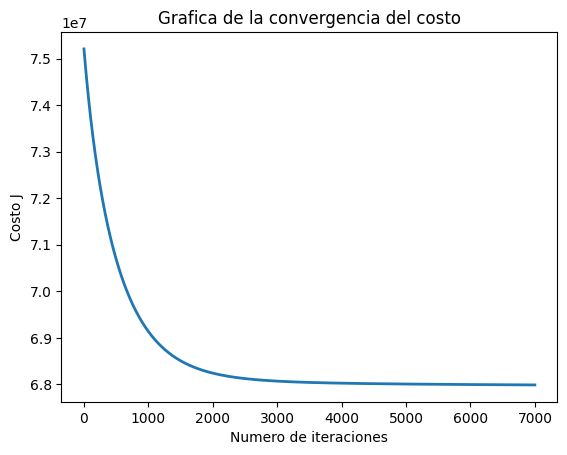

In [24]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

##### 1.1.4.1 Grafica de la regresion lineal

En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

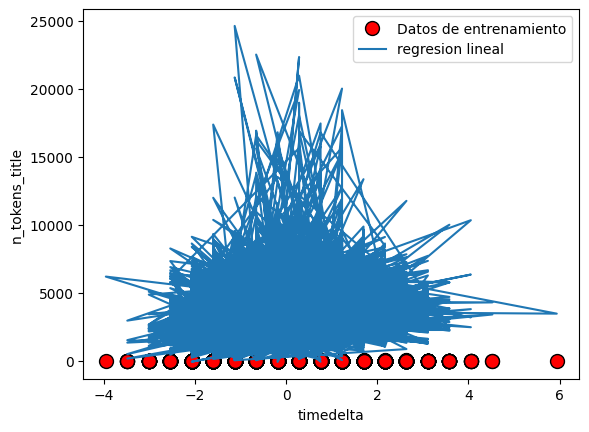

In [25]:
graficarDatos(X_norm[:, 1],  X_norm[:, 2] , "timedelta", "n_tokens_title")

pyplot.plot(X_norm[:,1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una pequeña prueba:

In [26]:
X_array = np.array([1, 731.0, 12.0, 219.0, 0.663594466988, 0.999999992308, 0.815384609112, 4.0, 2.0, 1.0, 0.0, 4.6803652968, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 496.0, 496.0, 496.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.500331204081, 0.378278929586, 0.0400046751006, 0.0412626477296, 0.0401225435029, 0.521617145481, 0.0925619834711, 0.0456621004566, 0.013698630137, 0.769230769231, 0.230769230769, 0.378636363636, 0.1, 0.7, -0.35, -0.6, -0.2, 0.5, -0.1875, 0.0, 0.1875])
X_array = X_array.reshape(1, -1)

X_array[:, 1:] = (X_array[:, 1:] - mu) / sigma

prediccion = np.dot(X_array, theta)

print (f"la prediccion de shares es de: {prediccion}")

la prediccion de shares es de: [1002.75861644]


#### 1.1.5 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [31]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos = np.array([
    [1,731.0, 9.0, 255.0, 0.604743080614, 0.999999993289, 0.79194630341, 3.0, 1.0, 1.0, 0.0, 4.9137254902, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.799755687423, 0.0500466753998, 0.0500962518137, 0.0501006734234, 0.0500007119405, 0.341245791246, 0.148947811448, 0.043137254902, 0.0156862745098, 0.733333333333, 0.266666666667, 0.286914600551, 0.0333333333333, 0.7, -0.11875, -0.125, -0.1, 0.0, 0.0, 0.5, 0.0],
    [1,731.0, 9.0, 255.0, 0.604743080614, 0.999999993289, 0.79194630341, 3.0, 1.0, 1.0, 0.0, 4.9137254902, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.799755687423, 0.0500466753998, 0.0500962518137, 0.0501006734234, 0.0500007119405, 0.341245791246, 0.148947811448, 0.043137254902, 0.0156862745098, 0.733333333333, 0.266666666667, 0.286914600551, 0.0333333333333, 0.7, -0.11875, -0.125, -0.1, 0.0, 0.0, 0.5, 0.0],
    [1,731.0, 13.0, 1072.0, 0.41564561695, 0.999999998565, 0.540889525766, 19.0, 19.0, 20.0, 0.0, 4.6828358209, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 545.0, 16000.0, 3151.15789474, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0286328101715, 0.0287935517322, 0.0285751849112, 0.028571675324, 0.885426777861, 0.513502122877, 0.281003475691, 0.0746268656716, 0.0121268656716, 0.860215053763, 0.139784946237, 0.411127435065, 0.0333333333333, 1.0, -0.220192307692, -0.5, -0.05, 0.454545454545, 0.136363636364, 0.0454545454545, 0.136363636364],
    [1,731.0, 13.0, 244.0, 0.559999997511, 0.999999993197, 0.680272104216, 3.0, 2.0, 1.0, 0.0, 4.42213114754, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2800.0, 2800.0, 2800.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.300293733076, 0.0500009756327, 0.0500010257644, 0.0500001760383, 0.549704089489, 0.331639928699, -0.0923054070113, 0.016393442623, 0.0245901639344, 0.4, 0.6, 0.292424242424, 0.136363636364, 0.433333333333, -0.456481481481, -1.0, -0.125, 0.7, -0.4, 0.2, 0.4],
    [1,731.0, 11.0, 723.0, 0.490934448409, 0.999999997845, 0.642241377926, 18.0, 1.0, 1.0, 0.0, 5.22821576763, 6.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.866656685064, 0.0333372075669, 0.0333354827452, 0.0333356642467, 0.0333349603771, 0.375048678466, 0.182696038139, 0.0636237897649, 0.00829875518672, 0.884615384615, 0.115384615385, 0.340572181442, 0.0333333333333, 1.0, -0.213888888889, -0.6, -0.1, 0.5, 0.5, 0.0, 0.5],
    [1,731.0, 14.0, 290.0, 0.611510789167, 0.999999994048, 0.76190475737, 0.0, 0.0, 14.0, 0.0, 4.06896551724, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0222448007009, 0.306856235824, 0.0222310333686, 0.0222241628314, 0.626443767275, 0.571906729634, 0.31812180244, 0.0620689655172, 0.0103448275862, 0.857142857143, 0.142857142857, 0.438908128908, 0.136363636364, 1.0, -0.177777777778, -0.4, -0.00833333333333, 0.0, 0.0, 0.5, 0.0]
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos[:, 1:] = (matriz_datos[:, 1:] - mu) / sigma


#Calculamos la Y predicha de los 6 ejemplos de prediccion
for datos in matriz_datos:
    y_pre.append(np.dot(datos, theta))


print("las predicciones para los 3 ejemplos son:")
i = 0
for i in range(len(matriz_datos)):
    print("Para el ejemplo ",i+1, y_pre[i])
    print("")

las predicciones para los 3 ejemplos son:
Para el ejemplo  1 862.3408720155841

Para el ejemplo  2 862.3408720155841

Para el ejemplo  3 1643.1231856697177

Para el ejemplo  4 1232.2093767126155

Para el ejemplo  5 1706.4341659840263

Para el ejemplo  6 2694.924063406836



#### 1.1.6 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

haciendo calculo del error cuadratico medio:

In [34]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu) / sigma

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLM = []
for data_RLM in X_testRLM_ready:
    y_predicha_RLM.append(np.dot(data_RLM, theta))

mse_RLM = mean_squared_error(y_predicha_RLM, y_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLM))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLM)))

Error Cuadrático Medio (MSE) = 117634906.31799
Raíz del Error Cuadrático Medio (RMSE) = 10845.962673639902


### ¿Concluciones?

Una vez hecha las predicciones del modelos, se puede determinar que el modelo no reliza las predicciones casi exactas, esto debido a la diferencia entre el valor esperado y el calculado.

**¿Porque?**

porque respecto al costo y el tiempo de entrenamiento que puedenson algo elevados, pero el modelo nos da un resultado mas cercano al valor que nosotros queremos encontrar como en este caso el numero de veces compartidas

### ¿Cuales son los mejores hiperparametros?

Se eligio aquellos hiperparametros de acuerdo a la grafica de costo realizada para cada modelo, guiandonos en que la grafica de costo no este muy curveada pero tampoco que este demasiado recta. A continuacion se muestra los hiperparametros seleccionados:
- **Numero de iteraciones.-** se eligio como una cantidad de **7000** iteraciones, esto para evitar el sobreajuste en la grafica de costo, porque con un numero de iteraciones mayor a 8000 generaba una una vurva demasiado ajustada en nuestra grafica de costo, y menor a 5000 la curva empezaba a pornerse recta, para encontrar un numero de iteraciones se hizo el promedio entre 8000 y 5000 y nos dio un numero de iteraciones de 7000, el cual al momento de graficar generaba una curva aceptable.

- **alpha.-** Para este hiperparametro se selecciono un valor de **0.0009** para cada modelo, esto porque se queria buscar una precision muy cercana al valor que se deseaba predecir, ya que a menor valor de alpha, mas preciso llega a ser el modelo.

- **Lambda.-** Para el hiperparametro **lambda** se uso el valor de **1000**, porque se siguio las recomendaciones que el hiperparametro lambda podria estar entre 10, 100 o 1000, se hizo la prueba con cada uno pero el que mejor resultados pero con mayor tiempo de entrenamiento y procesamiento nos dio fue el valor de un lamdda de *1000*, pero se hizo la prueba con un valor de lambda cercano a cero, y nos genero un costo muy cercano al costo del modelo sin regularizar, mientras que si usabamos un valor lambda negativo nos generaba una grafica contraria al de la curva esperada.